In [1]:
# supresses future warnings - See References #1
import warnings                                                 
warnings.simplefilter(action='ignore', category=FutureWarning)

# Import the pandas library for df creation
import pandas as pd

# Import the NumPy library to use the random package
import numpy as np

# Import the matplotlib library for plotting
import matplotlib.pyplot as plt

# set plot style
plt.style.use('seaborn-whitegrid')

# Use magic function to ensure plots render in a notebook
%matplotlib inline

# Import the seaborn library for plotting
import seaborn as sns

# The NumPy Package produces random numbers using Random Number Generators 
# This defines the process by which numbers are generated for use by NumPy functions 
# Generators are a reliable way to generate random numbers
# numpy.random offers several Random Number Generators. 
# By defining the Generator the your code becomes reliable and repeatable - See References #2
# Sets Generator type (the default BitGenerator - PCG64) with a declared value of 100 - See References #3
rng = np.random.default_rng(100)

# Set number of samples based on number of live births in 2016
n = 63739

## Introduction


The project requires us to simulate a real-world phenomenon of our choosing.
We have been asked to model and synthesis data related to this phenomenon using Python, in particular the numpy.random library. The output of the project should be a synthesized data set.

I will be examining the rate of breastfeeding initiation in Ireland. I will create a dataset of variables associated with breastfeeding. I will simulate the distribution of breastfeeding initiation in a random sample of an identified segment of the population. I will explore the relationships, if any, between these factors and how they may influence the rate of breastfeeding initiation.

This will include:
1.	The distribution of breastfeeding initiation in an identified segment of the population
2.	The factors contributing to breastfeeding initiation
3.	How these factors are distributed in the identified segment of the population

This topic is of particular interest to me as I have been successfully breastfeeding my own daughter for the past year. The publication of the National Perinatal Reporting System (NPRS) 2019 report [4] received widespread news coverage and highlighted the low rates of breastfeeding in Ireland [5] . On reflection I was unable to identify how I had arrived at the decision to breastfeed. I began to read more on the topic including how rates in Ireland compare to international rates and the socio-cultural changes in breastfeeding. From this I identified influencing factors on breastfeeding initiation. While I meet some of the criteria, I do not meet all. And yet as a mother in Ireland exclusively breastfeeding for over 12 months, I am one of only 7%. This intrigued me and I wanted to examine what factors may have influenced my breastfeeding journey. 

### Breastfeeding 

#### What is breastfeeding?
Breastfeeding, or nursing, is the process of providing an infant with their mother’s breastmilk [6]. This is usually done directly from the breast but can also be provided indirectly using expressed breast milk [*Ibid.*]. 
Breastfeeding is important as it offers numerous health benefits for both mother and infant.

**Benefits to infant:**
* Breast milk is naturally designed to meet the calorific and nutritional needs of an infant [7] and adapts to meet the needs of the infant as they change [8]
* Breast milk provides natural antibodies that help to protect against common infections and diseases [*Ibid.*]
* Breastfeeding is associated with better long-term health and wellbeing outcomes including less likelihood developing asthma or obesity and higher income in later life [9]

**Benefits to mother:** 
* Breastfeeding lowers the mother’s risk of breast and ovarian cancer, osteoporosis, cardiovascular disease, and obesity [10]. 
* Breastfeeding is associated with lower rates of post-natal depression and fewer depressive symptoms for women who do develop post-natal depression while breastfeeding [11, 12].  
* Breastfeeding is a cost effective, safe and hygienic method of infant feeding [13]. 

The World Health Organisation (WHO), and numerous other organizations recommend exclusively breastfeeding for the first 6 months of an infant’s life and breastfeeding supplemented by other foods from 6 months on [14, 15, 16, 17]. However, globally nearly 2 out of 3 infants are not exclusively breastfed for the first 6 months [18]. 

Ireland has one of the lowest breastfeeding initiation rates in the world, with 63.8% of mothers breastfeeding for their child's first feed [19]. The rate of breastfeeding drops subtantially within days as on average only 37.3% of mothers are breastfeeding on discharge from hospital [*Ibid.*].

Given the physical, social and economic advantages to breastfeeding over articifical and combination feeding (a mix of breast and artificial) both the WHO and the HSE have undertaken a number of measures to increase the rates of breastfeeding initiation and exclusive breastfeeding for the first six months in Ireland [20, 21].

Funded research is one of these measures including national longitudinal studies to identify factors that may influence breastfeeding rates [22].

A review of some of the completed research projects has identified common factors that have been researched and for which there is a bank of data to refer to. These are identified in the table below:

| Variable Name            | Description        | Data Type | Distribution      |
|--------------------------|--------------------|-----------|-------------------|
| Age                      |                    | Numeric   | Normal/Triangular |
| Civil Status             |                    | Boolean   |                   |
| Private Health Insurance |                    | Boolean   |                   |

These factors will be used as the variables for the development of the dataset. The fourth variable will be 'Breastfeeding Initiation'. This will be informed by information from existing research and dependent on values assigned to records under the other variables. 

| Variable Name            | Description        | Data Type | Distribution      |
|--------------------------|--------------------|-----------|-------------------|
| Breastfeeding Initiation | Dependent Variable | Boolean   |                   |

A trawl of information sources led to the decision to use data from 2016. While NPRS produce annual reports they are published with a 12 month delay and final versions (following feedback and review) are available after 24 months. This means the 2017 report is the latest final version available. 

An initial search for information on Civil Status statistics led to the 2016 census data. While this ultimately wasn't used it guided the use of the 2016 NPRS data. Similarily historical data on Private Health Insurance rates in Ireland varies greatly and 2016 seemed to produce the most applicable data for use here. 

Below is an oytline of each variable, the data is is based on and how it will be used for the development of a dataset. 

## Age

A review of data provided by the NPRS study is used here to determine how maternal age is distributed across the population - mothers with live births in 2016 [23].

While age is a numerical value it is presented by NPRS as a categorical variable/discrete groups, ranging from under 20 years of age to 45 years of age and older. The NPRS study provides the frequency and percentages of births within each group.

In [23]:
# Downloaded NPRS_Age.csv from NPRS 2016 Report
age = pd.read_csv("Data/Age_and_Feeding_Type.csv", index_col='Age Group')

# Integer based indexing for selection by position - See References #24 
age = age.iloc[0:7, 0:7]

age

,Artificial,Breast,Combined,Total
Age Group,,,,
Under 20 Years,786,250,66,1102
20-24 Years,3158,1632,388,5178
25-29 Years,5409,4883,1099,11391
30-34 Years,8284,12193,2470,22947
35-39 Years,6458,10266,2004,18728
40-44 Years,1380,2173,548,4101
45 Years and Over,94,144,54,292


The grouping of data by age group reduces the usefullness of the `describe()` function on the dataframe.However, an initial view of the NPRS data indicates that the data is somewhat normally distributed with births increasing in the 25 - 29 age group, peaking at 30 - 34 years of age and beginning to decline in the 35 - 39 age set. 

Visualising the data set supports this analysis. It shows a minimum value of less than 20 years of age increasing in a positive direction until it significant peak around 32 years of age - the midpoint of the age group with the greatest frequency of births. 

ValueError: x and y must have same first dimension, but have shapes (7,) and (4,)

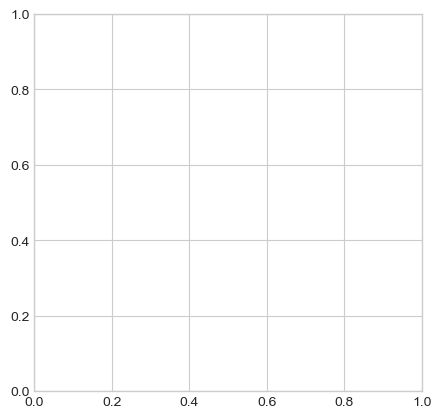

In [17]:
# Creates a figure and a set of subplots.
fig, ax = plt.subplots(figsize=(5, 5), dpi=100)
x_pos = np.arange(7)

# Plot x versus y as markers
ax.plot(x_pos, age.iloc[0, :], marker='^', label='Breast')
ax.plot(x_pos, age.iloc[1, :], marker='^', label='Artificial')
ax.plot(x_pos, age.iloc[2, :], marker='^', label='Combined')

# Set labels for chart and axes
ax.set_title('Age and Feeding Type')
ax.set_xlabel('Maternal Age at Time of Birth')
ax.set_ylabel('Frequency')

# Create names on the x-axis
ax.set_xticks(x_pos)

# Rotate to make labels easier to read
ax.set_xticklabels(age.columns, rotation=90)

# Position legend
ax.legend(loc="best")

# Show plot
plt.show()

This can be replicated using a Trinangualr Distribution. This generates a random number from a weighted range by distribuing events between the maximum and minimum values provided, based on a third value that indicates what the most likely outcome will be.[25, 26] Here we are looking for 100 events (births) distributed between the ages of 16 and 50 with a known peak where the mothers age is 32.

Here is your triangular continuous random variable:
 [35 32 34 27 20 25 36 39 42 27 37 28 25 35 35 41 35 40 42 33 22 33 31 28
 47 28 24 43 30 26 21 37 33 31 32 34 30 35 26 41 33 24 37 30 36 30 37 26
 36 21 39 34 34 24 25 31 36 31 24 43 23 39 30 41 42 33 33 22 44 31 24 36
 27 31 33 35 39 33 30 41 30 25 40 35 33 29 25 47 41 38 37 46 28 35 38 37
 30 36 39 31]


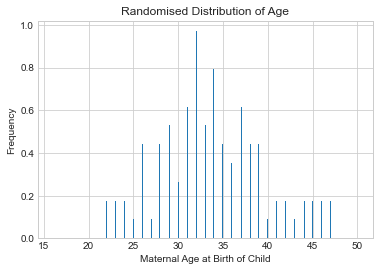

In [18]:
# Here we are looking for a random array with a lower limit of 16 an upper limit of 50
# and 32 being the number that appears most frequently (the mid point of the most frequent age group)
# over n number of instances where n is the total number of births
# and for the out to be presented on a Triangular Distribution plot

Tri_var = np.random.triangular(left = 20, mode = 30, right = 50, size = 100).astype(int)
print ("Here is your triangular continuous random variable:\n % s" % (Tri_var)) # [55]

#  https://stackoverflow.com/questions/60870070/a-weighted-version-of-random-randint
plt.hist(np.ma.round(np.random.triangular(left = 20, mode = 30, right = 50, size = 100)).astype(int),
        range = (16, 50), bins = 300, density = True)

# Set labels for chart and axes
plt.title('Randomised Distribution of Age')
plt.xlabel('Maternal Age at Birth of Child')
plt.ylabel('Frequency')

# Show plot
plt.show()

## Civil Status

Research has shown that maternal marital status at the time of birth is significantly associated with breastfeeding initiation [27,28,29].

Data captured in the 2016 NPRS survey does not capture relational data between breastfeeding initiation and maternal marital status at the time of birth [30]. However it does provide percentage values for maternal marital status across all age groups:

| Maternal Civil Status at Birth | Percentage of Total births |
|--------------------------------|----------------------------|
| Married                        | 62.2                       |
| Single                         | 36.4                       |
| Other                          | 1.4                        |


Central Statistics Office (CSO) data on civil status for 2016 does record information across all age groups [31]. However, as it only captures data for 
* Marriages
* Civil parnerships
* Divorces, Judicial Separation and Nullity applications received by the courts 
* Divorces, Judicial Separation and Nullity applications granted by the courts 

It does not capture other civil arrangements such as informal seperations or and co-habitants.

For the purposes of this simulation the NPRS data will be used.

This is a categorical variable that has 3 possible values
1. Married
2. Single
3. Other (encompassing all other civil statuses as indentified by the survey respondant)

Based on the information in the NPRS report `rng.choice` can be used to randomly distribute these values across the dataset population.

In [5]:
# Classifying Martial Status
# 'single' if single, 'married' if married and 'other' for all other categories
civil_status = ['single', 'married', 'other']

# Randomisation of civil status based on the probability provided
civil_status = rng.choice(civil_status, n, p=[0.22, 0.72, 0.06])

# https://stackoverflow.com/questions/42916330/efficiently-count-zero-elements-in-numpy-array/42916378
print("Single: ", np.count_nonzero(civil_status == 'single'))
print("Married: ", np.count_nonzero(civil_status == 'married'))
print("Other: ", np.count_nonzero(civil_status == 'other'))

Single:  14056
Married:  45799
Other:  3884


## Insurance Status

Gallagher's reasearch also highlighted a significant association between the health insurance status of a mother was a factor in breastfeeding initiation [32]. A review of other research into factors affecting breastfeeding initiation showed that access to enhanced peri and post natal medical care have considerable influence on breastfeeding initiation and continuance [33, 34, 35]. These were primarily completed in countries without a funded, or part funded, national health service. While these demonstrated that mothers with private health insurance were more likely to initiate breastfeeding they weren't comparable in an Irish context. However, a follow-on study from Gallagher's research further supported her findings that maternal access to private health insurance increased the likelihood of breastfeeding [36].

The Health Insurance Authority (HIA) in Ireland offers a comparsion tool for health insurance policies including the services available under each plan [37]. A review, carried out in December 2020, shows that of 314 plans on offer 237 provide out patient maternity benefits which cover peri and post natal cover care and support systems. These include one-to-one postnatal consultation with a lactation consultant. 

For mother's without health insurance, maternity care in ireland is provided under the Maternity and Infant Care Scheme [38]. This is a combined hospital and GP service for the duration of pregnancy and 6 weeks postpartum. No specific resources are made available to support breastfeeding. Though maternity hospitals and units may offer breastfeeding information sessions and one-to-one lactation consultations where needed. Access to these supports are limited. The Coombe Women's and Children's Hospital, for example, handles around 8,000 births per year [39] provides breastfeeding information sessions to less than 1,000 mothers per year [40]. There are a number of community supports for breastfeeding including [Le Leche](https://www.lalecheleagueireland.com/), [Friends of Breastfeeding](https://www.friendsofbreastfeeding.ie/) and [Cuidiu](https://www.cuidiu.ie/) and private lactation consultants. Interestingly, neither Irish study assessed whether mother's accessed these services preinatally. 

Gallaghers research showed that 66% of insured mother's initiated breastfeeding [41]. As insurance status can only have two possible outcomes (True or False) a binomial distribution was initially used to evaluate distribution across `n` number of births. 

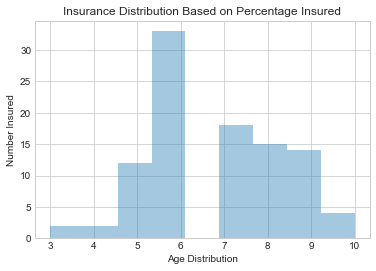

In [20]:
# Here we are looking for a Binomial Distribution 
# with probability of 0.66 for each trial
# repeated `n` times
# to be presented as a Binomial Bistribution plot
sns.distplot(rng.binomial(n=10, p=0.66, size=n), hist=True, kde=False)

# Set labels for chart and axes
plt.title('Insurance Distribution Based on Percentage Insured')
plt.xlabel('Age Distribution')
plt.ylabel('Number Insured')

# Show plot
plt.show()

While this randomly allocated health insurance status it didn't distribute this across the age groups in an informed way.

The HIA also provide historical market statistics on insurance in Ireland [42]. Data for 2016 based on the age groups previously used, the number of the total population insured within these groupings that are insured and the percentage of the total insured ppopulation these represent was extracted from the HIA historical market statistics into a csv file. 

In [22]:
# Downloaded HIA historicial market statistics
ins = pd.read_csv("Data/Insurance_by_Age.csv")
ins

,Age,Total number,Percentage Insured
0,Under 20,1102,10
1,20 - 24 Years,5178,9
2,25 - 29 Years,11391,9
3,30 - 34 Years,22947,14
4,35 - 39 Years,18728,19
5,40 - 45 Years,4101,19
6,45 years and Over,292,20


The extracted data shows a positive increase in the number of people insured from ages 20 to 35. Peaking significantly in the 35-39 category and declining thereafter. Visualising the data suppurts thsi analysis.

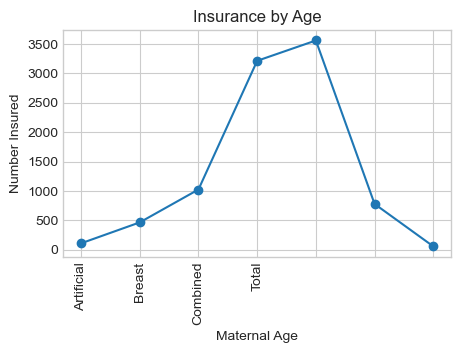

In [24]:
# Downloaded HIA historicial market statistics
ins = pd.read_csv('Data/Insurance_by_Age.csv', index_col='Age')

# Transpose index and columns 
ins = ins.T
ins

# Creates a figure and a set of subplots
fig, ax = plt.subplots(figsize=(5,3), dpi=100)
x_pos = np.arange(7)

# Integer based indexing for selection by position - See References #24 
# Scaled down
y = ins.iloc[1, :] / 100
y = y*ins.iloc[0, :]

# Plot x versus y as markers
ax.plot(x_pos, y, marker='o', label='Insurance')

# Set labels for chart and axes
ax.set_title('Insurance by Age')
ax.set_xlabel('Maternal Age')
ax.set_ylabel('Number Insured')

# Create names on the x-axis
ax.set_xticks(x_pos)

# Rotate to make labels easier to read
ax.set_xticklabels(age.columns, rotation=90)

# Show plot
plt.show()

While it isn't possibel to get a breakdown of insurance status by gender or linked to the parity of women within the given age groups, the above analysis has provided two points to work from in the generated dataset. The percentage of people within the age groups that are likely to have health insurance and that 66% of pregnant women have health insurance. 

In [25]:
# ins_by_age(x) takes one argument - the age of the person
# based on this number and the percentages identified from HIA 
# it gives each record a value of True or False

# a dict that holds the HIA statistics
def ins_by_age (x):
        
        agerange_insurance = {range(15,20) : 10,
                                  range(20,25) : 9,
                                  range(25,30) : 9,
                                  range(30,35) : 14,
                                  range(35,40) : 19,
                                  range(40,45) : 19,
                                  range(45,50) : 20}
        
# Introduce randomisation by assigning True or False based on
# a randomly assigned number generated by rng.integers
 
        for i in agerange_insurance:
                if x in i:
                        y =  rng.integers(1,100)
                        if y <= agerange_insurance[i]:
                              return True  
                        return False
                    
health_ins_status = np.array([ins_by_age(i) for i in age])

df['Health Insurance Status'] = health_ins_status

ValueError: Length of values does not match length of index

## Initiate Breastfeeding

This variable is based on the data used above and in Gallagher's study [43]. 

Using the data from the NPRS report the percentage of women within each age group that are likely to initatie breastfeeding can be calculated.

In [9]:
# Percentage of total births taht initiate breastfeeding
age = pd.read_csv("Data/Age_and_Feeding_Type.csv")
age = age.iloc[0:7, 0:8]
age['pct']=age['Breast']/(age['Total'])*100  

age

,Age Group,Artificial,Breast,Combined,Total,pct
0,Under 20 Years,786,250,66,1102,22.686025
1,20-24 Years,3158,1632,388,5178,31.517961
2,25-29 Years,5409,4883,1099,11391,42.867176
3,30-34 Years,8284,12193,2470,22947,53.135486
4,35-39 Years,6458,10266,2004,18728,54.816318
5,40-44 Years,1380,2173,548,4101,52.987076
6,45 Years and Over,94,144,54,292,49.315068


Additionally, this variable will be a dependant variable influenced by data from the other variables and information Gallagher's study:
1. Women with health insurance are more likely to initiate breastfeeding
 * 66% of women have access to health insurance [44]
2. Civil Status influences the likelihood of breastfeeding
 * Married women are 3 times more likely to breastfeed

## Data Set

In [10]:
# the number of records
n = 100

### Variable 1 - Age 

In [11]:
age_dist = (np.random.triangular(left = 16, mode = 30, right = 50, size = 500)).astype(int)
age = rng.choice(age_dist, n)
df = pd.DataFrame(age, columns = ['Maternal Age'])

### Variable 2 - Civil Status

In [12]:
civstat_options = ['single', 'married', 'other']
df['Civil Status'] = rng.choice(civstat_options, n, p=[0.05, 0.39, 0.56])

### Varible 3 - Insurance Status

In [27]:
# ins_by_age(x) takes one argument - the age of the person
# based on this number and the percentages identified from HIA 
# it gives each record a value of True or False

# a dictionary that holds the HIA statistics

def ins_by_age (x):
        
        agerange_insurance = {range(15,20) : 10,
                                  range(20,25) : 9,
                                  range(25,30) : 9,
                                  range(30,35) : 14,
                                  range(35,40) : 19,
                                  range(40,45) : 19,
                                  range(45,50) : 20}

        # Introduce randomisation by assigning True or False based on
        # a randomly assigned number generated by rng.integers

        for i in agerange_insurance:
                if x in i:
                        y =  rng.integers(1,100)
                        if y <= agerange_insurance[i]:
                              return True  
                        return False
                    
health_ins_status = np.array([ins_by_age(i) for i in age])

df['Health Insurance Status'] = health_ins_status

ValueError: Length of values does not match length of index

### Variable 4 - Initate Breastfeeding

In [30]:
# ins_by_age(x) takes one argument - the age of the person
# based on this number and the percentages identified from HIA 
# it gives each record a value of True or False

# a dictionary that holds the calculated percentage statistics

def breastfeeding(x):
        
        bf_status = {range(15,20) : 23,
                     range(20,25) : 32,
                     range(25,30) : 43,
                     range(30,35) : 53,
                     range(35,40) : 55,
                     range(40,45) : 53,
                     range(45,50) : 50}

        a = age[x]  # the age of the person
        b = health_ins_status[x]  # the person's health insurance status
        c = civil_status[x]  # the person's marital status

        q = 3 if c == 'Married' else 2 if c == 'Other' else 1 
        # If married they are 3 times more likely to start the program
        # Assigning 2 for people with Other as they may have an informal arrangemnt
        # Assigning 1 for people who identify as Single

        # Introduce randomisation by assigning True or False based on
        # a randomly assigned number generated by rng.integers
        for i in bf_status:
                if a in i:
                        y =  rng.integers(1,1000)
                        if y <= q*bf_status[i] or (b == True and y <= 66): # Using 66 as ^^% of insured women initiate breastfeeding
                              return True  
                        return False

# generating the variable based on the function
initiate_bf = np.array([breastfeeding(i) for i in age])

df['Initiate Breastfeeding'] = initiate_bf

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

### Dataset

In [15]:
# See References #45 and #46 

pd.set_option("expand_frame_repr", True)

df

,Maternal Age,Civil Status,Health Insurance Status,Initiate Breastfeeding
0,32,other,False,True
1,27,married,False,False
2,18,single,False,False
3,42,married,True,False
4,23,married,False,False
...,...,...,...,...
95,28,other,False,False
96,43,other,False,False
97,31,married,False,False
98,32,other,False,False


##### References

1. https://stackoverflow.com/questions/15777951/how-to-suppress-pandas-future-warning
2. Machine Learning Mastery, How to Generate Random Numbers in Python, Available at: https://machinelearningmastery.com/how-to-generate-random-numbers-in-python/
3. https://numpy.org/doc/stable/reference/random/generator.html]
4. https://media.npr.org/documents/about/annualreports/2019_Annual_Report.pdf
5. https://www.irishtimes.com/news/health/ireland-has-one-of-the-lowest-breastfeeding-rates-in-the-world-report-1.4391626
6. World Health Organisation (2020) Breastfeeding, Available at https://www.who.int/health-topics/breastfeeding
7. https://www.who.int/news-room/fact-sheets/detail/infant-and-young-child-feeding
8. National Health Service (2020) Benefits of breastfeeding - Your pregnancy and baby guide, Available at: https://www.nhs.uk/conditions/pregnancy-and-baby/benefits-breastfeeding/ 
9. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1448489/
10. https://www.nhs.uk/conditions/baby/breastfeeding-and-bottle-feeding/breastfeeding/benefits/
11. Borra, C., Iacovou, M., Sevilla, A. 2015. New evidence on breastfeeding and postpartum depression: the importance of understanding women’s intentions. Maternal and Child Health Journal, 19, pp. 887-907.
12. Dennis, C.L., McQueen, K. 2009. The relationship between infant-feeding outcomes and postpartum depression: a qualitative systematic review. Pediatrics, 123, pp. 736-751
13. https://www.unicef.org/media/media_70044.html
14. https://www.who.int/health-topics/breastfeeding
15. https://doi.org/10.1542/peds.2011-3552
16. https://www.nhs.uk/conditions/baby/breastfeeding-and-bottle-feeding/breastfeeding/ 
17. https://www2.hse.ie/wellbeing/child-health/extended-breastfeeding-beyond-1-year.html
18. https://www.who.int/health-topics/breastfeeding
19. https://www.hse.ie/eng/about/who/acute-hospitals-division/woman-infants/national-reports-on-womens-health/imis-national-report-2019.pdf
20. https://apps.who.int/iris/bitstream/handle/10665/259386/9789241550086-eng.pdf
21. https://www.hse.ie/eng/about/who/healthwellbeing/our-priority-programmes/child-health-and-wellbeing/breastfeeding-healthy-childhood-programme/research-and-reports-breastfeeding/breastfeeding-on-the-island-of-ireland-report.pdf
22. https://www.hse.ie/eng/about/who/healthwellbeing/our-priority-programmes/child-health-and-wellbeing/breastfeeding-healthy-childhood-programme/research-and-reports-breastfeeding/breastfeeding-in-a-healthy-ireland.html
23. http://www.hpo.ie/latest_hipe_nprs_reports/NPRS_2017/Perinatal_Statistics_Report_2017.pdf
24. https://pandas.pydata.org/pandas-docs/version/1.0.2/reference/api/pandas.DataFrame.iloc.html?highlight=iloc
25. numpy.random.triangular, Available at: https://numpy.org/doc/stable/reference/random/generated/numpy.random.triangular.html
26. Python – Triangular Distribution in Statistics, Available at: https://www.geeksforgeeks.org/python-triangular-distribution-in-statistics/
27. Gallagher L, Begley C, Clarke M, Determinants of breastfeeding initiation in Ireland., Irish journal of medical science, 185, 3, 2015, 663 - 668 
28. https://www.sciencedirect.com/science/article/abs/pii/S0884217515301866
29. https://www.sciencedirect.com/science/article/abs/pii/S1049386716300391
30. http://www.hpo.ie/latest_hipe_nprs_reports/NPRS_2016/Perinatal_Statistics_Report_2016.pdf
31. https://www.cso.ie/en/releasesandpublications/er/mcp/marriagesandcivilpartnerships2016/
32. Gallagher L, Begley C, Clarke M, Determinants of breastfeeding initiation in Ireland., Irish journal of medical science, 185, 3, 2015, 663 - 668
33. https://ajph.aphapublications.org/doi/abs/10.2105/AJPH.2017.304108
34. https://pediatrics.aappublications.org/content/118/4/e1048
35. https://europepmc.org/article/med/24626693
36. https://www.sciencedirect.com/science/article/abs/pii/S0266613817302814
37. https://www.hia.ie/
38. https://www.hse.ie/eng/services/list/3/maternity/combinedcare.html
39. https://www.inmo.ie/Home/Index/217/13585
40. http://www.d1048212.blacknight.com/index.php?nodeId=231
41. Gallagher L, Begley C, Clarke M, Determinants of breastfeeding initiation in Ireland., Irish journal of medical science, 185, 3, 2015, 663 - 668
42. https://www.hia.ie/publication/market-statistics
43. Gallagher L, Begley C, Clarke M, Determinants of breastfeeding initiation in Ireland., Irish journal of medical science, 185, 3, 2015, 663 - 668
44. Gallagher L, Begley C, Clarke M, Determinants of breastfeeding initiation in Ireland., Irish journal of medical science, 185, 3, 2015, 663 - 668
45. https://stackoverflow.com/questions/25351968/how-to-display-full-non-truncated-dataframe-information-in-html-when-convertin
46. https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html#frequently-used-options


### Other Sources
Yvonne L. Hauck, Ingrid Blixt, Ingegerd Hildingsson, Louise Gallagher, Christine Rubertsson, Brooke Thomson and Lucy Lewis, Australian, Irish and Swedish women's perceptions of what assisted them to breastfeed for six months: exploratory design using critical incident technique, BMC Public Health, 16, (1067), 2016

American Academy of Pediatrics. (2012). Breastfeeding and the use of human milk. Pediatrics, 129(3), e827–e841. Available at: https://pediatrics.aappublications.org/content/129/3/e827

Remove Unnamed Columns in Pandas Dataframe, Avilable at: https://stackoverflow.com/questions/43983622/remove-unnamed-columns-in-pandas-dataframe

Basic Syntax, Available at: https://www.markdownguide.org/basic-syntax/

Mastering Markdown, Available at: https://guides.github.com/features/mastering-markdown/

Matplotlib: Visualization with Python, Available at: https://matplotlib.org/

Seaborn User guide and tutorial, Available at: https://seaborn.pydata.org/tutorial.html